<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_04_Fundamentals_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalization : The goal of machine Learning

Te fundamental issue in machine learning is the tenaion between optimization and generalization . **Optimization** refers to the process of adjusting a model to get the best performance possible on training data(The learning in machine learning)

**Generalization** refers to how well trained model performs on data it has never seen before.

#Underfitting and Overfitting

at the beginning of training , optimization and generalization are correlated , lower the loss on training data , the lower the loss on test data , while this is happening your model is **underfit**.

**overfitting** - when we get better accuracy on training data but less on testing data.

overfitting likely to occur when your data is noisy, if it involves uncertainity , or it includes rare features


**Adding white noise channels or all zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zeros channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.6182 - accuracy: 0.8108 - val_loss: 0.3038 - val_accuracy: 0.9059
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2552 - accuracy: 0.9218 - val_loss: 0.2101 - val_accuracy: 0.9358
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1670 - accuracy: 0.9483 - val_loss: 0.1617 - val_accuracy: 0.9526
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.1502 - val_accuracy: 0.9552
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0857 - accuracy: 0.9729 - val_loss: 0.1240 - val_accuracy: 0.9646
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0631 - accuracy: 0.9802 - val_loss: 0.1216 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.1274 - val_accuracy: 0.9643

**Plotting a validation accuracy comparision**

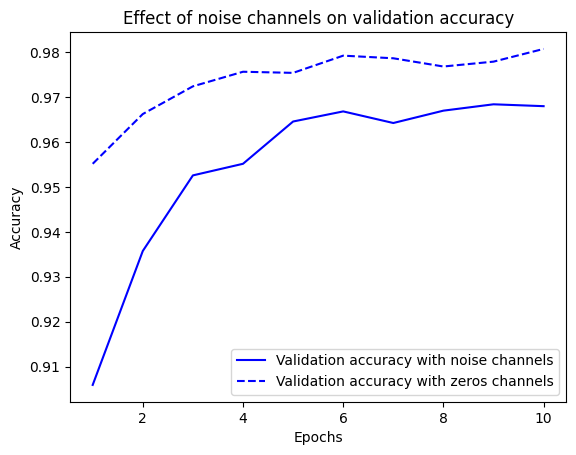

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Despite the data holding the same information in both cases , the validation accuracy of the model trained with noise channels ends up about one percentage point lower , purely through the influence of spurious correlation . The more noise channels you add , the further accuracy will degrade.

#The nature of generalization in Deep Learning

The remarkable fact about deep learning model is that they can be trained to fit anything , as long as they enough representational power 

Try shuffling the MNISt labels and train a model on that.Even though there is no relationship whatsoever between the inputs and the shuffled labels , the training loss goes down just fine , even with a relatively small model

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 2.3148 - accuracy: 0.1033 - val_loss: 2.3048 - val_accuracy: 0.1083
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2991 - accuracy: 0.1167 - val_loss: 2.3129 - val_accuracy: 0.0984
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2906 - accuracy: 0.1268 - val_loss: 2.3152 - val_accuracy: 0.1055
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2794 - accuracy: 0.1375 - val_loss: 2.3255 - val_accuracy: 0.0997
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2633 - accuracy: 0.1494 - val_loss: 2.3408 - val_accuracy: 0.0998
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2435 - accuracy: 0.1637 - val_loss: 2.3492 - val_accuracy: 0.1015
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2215 - accuracy: 0.1814 - val_loss: 2.3612 - val_accuracy: 0.101

**The manifold hypothesis**

**Interpolation as a source of generalization**

**Why deep learning works**

A deep learning model is basically a very high-dimensional curve-a curve that is smooth and continuous (with additional constraints on its structure, originating from model architecture priors), since it needs to be differentiable. And that curve is fitted to data points via gradient descent, smoothly and incrementally. By its very nature, deep learning is about taking a big, complex curve-a manifold-and incrementally adjusting its parameters until it fits some training data points.


The curve involves enough parameters that it could fit anything—indeed, if you let your model train for long enough, it will effectively end up purely memorizing its training data and won't generalize at all. However, the data you're fitting to isn't made of isolated points sparsely distributed across the underlying space. Your data forms a highly structured, low-dimensional manifold within the input space-that's the mani- fold hypothesis. And because fitting your model curve to this data happens gradually and smoothly over time as gradient descent progresses, there will be an intermediate point during training at which the model roughly approximates the natural manifold of the data,

**Training data is paramount**

#Evaluating machine-learning models

**Training, validation, and test sets**

Evaluating a model always boils down to splitting the available data into three sets: training, validation, and test. You train on the training data and evaluate your model on the validation data. Once your model is ready for prime time, you test it one final time on the test data, which is meant to be as similar as possible to production data. Then you can deploy the model in production.

You y ask, why not have two sets: a training set and a test set? You'd train on the may training data and evaluate on the test data. Much simpler!

The reason is that developing a model always involves tuning its configuration: for example, choosing the number of layers or the size of the layers (called the hyperpa- rameters of the model, to distinguish them from the parameters, which are the network's weights). You do this tuning by using as a feedback signal the performance of the model on the validation data. In essence, this tuning is a form of learning a search for a good configuration in some parameter space. As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in over-

fitting to the validation set, even though your model is never directly trained on it

Central to this phenomenon is the notion of information leaks. Every time you tune a hyperparameter of your model based on the model's performance on the validation set, some information about the validation data leaks into the model. If you do this only once, for one parameter, then very few bits of information will leak, and your val idation set will remain reliable for evaluating the model. But if you repeat this many times-running one experiment, evaluating on the validation set, and modifying your model as a result-then you'll leak an increasingly significant amount of information about the cation set into the model.

At the end the day, you'll end up with a model that performs artificially well on the wild because that's what you optimized it for. You care about perfor mance on couge new data, not on the validation data, so you need to use a com pletely different, never-before-seen dataset to evaluate the model: the test dataset Your model shouldn't have had access to any information about the test set, even indi- rectly. If anything about the model has been tuned based on test set performance, then your measure of generalization will be flawed.




Splitting your data into training, validation, and test sets may seem but there are a few advanced ways to do it that can come in handy when little data is available. Let's review three classic evaluation :

**Simple hold-out validation**

Set apart some fraction of your data as your test set. Train on the remaining data, and evaluate on the test set. As you saw in the previous sections, in order to prevent infor mation leaks, you shouldn't tune your model based on the test set, and therefore you should also reserve a validation set.

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is available, then your validation and test sets may contain too few samples to be statisti- cally representative of the data at hand. This is easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then you're having this issue. K-fold validation and iterated K-fold validation are two ways to address this, as discussed next.


**K-fold validation**

With this approach, you split your data into K partitions of equal size. For each parti- tion i, train a model on the remaining K 1 partitions, and evaluate it on partition i. - Your final score is then the averages of the K scores obtained. This method is helpful when the performance of your model shows significant variance based on your train- test split. Like holdout validation, this method doesn't exempt you from using a dis- tinct validation set for model calibration.


**Iterated K-fold validation with shuffling**

This one is for situations in which you have relatively little data available and vou need to evaluate your model as precisely as possible. I've found it to be extremely elpful in Kaggle competitions. It consists of applying K-fold validation multiple times, huffling the data every time before splitting it K ways. The final score is the avera of the scores obtained at each run of K-fold validation. Note that you end up trai ng and evaluating PK models (where P is the number of iterations you use), which can be very expensive.
**Beating a common-sense baseline**

**Things to keep in mind about model evaluation**

#Improving model fit

To achieve the perfect fit, you must first overfit. Since you don't know in advance where the boundary lies, you must cross it to find it. Thus, your initial goal as you start working on a problem is to achieve a model that shows some generalization power and that is able to overfit. Once you have such a model, you'll focus on refining gener- alization by fighting overfitting.

There are three common problems you'll encounter at this stage:

1. Training doesn't get started: your training loss doesn't go down over time.  2. Training gets started just fine, but your model doesn't meaningfully generalize: you can't beat the common-sense baseline you set.
3. Training and validation loss both go down over time, and you can beat your baseline, but you don't seem to be able to overfit, which indicates you're still underfitting.

**Tuning key gradient descent parameters**

Sometimes training doesn't get started, or it stalls too early. Your loss is stuck. This is always something you can overcome: remember that you can fit a model to random data
When this happens, it's always a problem with the configuration of the gradient descent process: your choice of optimizer, the distribution of initial values in the weights of your model, your learning rate, or your batch size.

**Training a MNIST model with an incorrectly high learning rate**


In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

The model quickly reaches a training and validation accuracy in the 30%-40% range but cannot get past that. Let's try to lower the learning rate to a more reasonable value of 1e-2.

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

The model is now able to train.

If you find yourself in a similar situation, try

■Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.

• Increasing the batch size. A batch with more samples will lead to gradients that

are more informative and less noisy (lower variance).


#Leveraging better architecture priors

You have a model that fits  but for some reason your validation metrics aren't improv ing at all. They remain no better than what a random classifier would achieve: your model train but doesn't generalize. What's going on?

This is perhaps the worst machine learning situation you can find yourself in. It indicates that something is fundamentally wrong with your approach, and it may not be easy to tell what. Here are some tips.

First, it may be that the input data you're using simply doesn't contain sufficient information to predict your targets

**Increasing model capacity**

**A simple logistic regression on MNIST**

If you manage to get to a model that fits, where validation metrics are going down, and that seems to achieve at least some level of generalization power, congratulations you're almost there. Next, you need to get your model to start overfitting.

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Validation metrics seem to stall, or to improve very slowly, instead of peaking and reversing course. The validation loss goes to 0.26 and just stays there. You can fit, but you can't clearly overfit, even after many iterations over the training data. You're likely to encounter similar curves often in your career.

Remember that it should always be possible to overfit. Much like the problem where the training loss doesn't go down, this is an issue that can always be solved. 

if you can't seem to be able to overfit, it's likely a problem with the representational power of your model: you're going to need a bigger model, one with more capacity, that is to say, one able to store more information. You can increase representational power by adding more layers, using bigger layers (layers with more parameters), or using kinds of layers that are more appropriate for the problem at hand (better architecture priors).

Lets try traning a bigger model 

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#Improving generalization

**Dataset curation**
As such, it is essential that you make sure that you're working with an appropriate dataset. Spending more effort and money on data collection almost always yields a much greater return on investment than spending the same on developing a better model.

* Make sure you have enough data. Remember that you need a dense sampling of the input-cross-output space. More data will yield a better model. Sometimes problems that seem impossible at first become solvable with a larger dataset. ■ Minimize labeling errors-visualize your inputs to check for anomalies, and proofread your labels.

■ Clean your data and deal with missing values (we'll cover this in the next chapter). If you have many features and you aren't sure which ones are actually useful, do

A particularly important way to improve the generalization potential of your data is feature engineering.

**Feature engineering**
Feature engineering is the process of using your own knowledge about the data and about the machine learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (non-learned) transformations to the data before it goes into the model. In many cases, it isn't reasonable to expect a machine learning model to be able to learn from completely arbitrary data. The data needs to be presented to the model in a way that will make the model's job easier.

Good features still allow you to solve problems more elegantly while using fewer resources. For instance, it would be ridiculous to solve the problem of reading a clock face using a convolutional neural network.

Good features let you solve a problem with far less data. The ability of deep learning models to learn features on their own relies on having lots of training data available; if you have only a few samples, the information value in their fea tures becomes critical.

**Using early stopping**

Finding the exact point during training where you've reached the most generaliz able fit-the exact boundary between an underfit curve and an overfit curve-is one of the most effective things you can do to improve generalization.

In the examples in the previous chapter, we would start by training our models for longer than needed to figure out the number of epochs that yielded the best valida tion metrics, and then we would retrain a new model for exactly that number of epochs. This is pretty standard, but it requires you to do redundant work, which can sometimes be expensive. Naturally, you could just save your model at the end of each epoch, and once you've found the best epoch, reuse the closest saved model you have. In Keras, it's typical to do this with an EarlyStopping callback, which will interrupt training as soon as validation metrics have stopped improving, while best known model state

#Regularizing your model
Regularization techniques are a set of best practices that actively impede the model's abil- ity to fit perfectly to the training data, with the goal of making the model perform bet- ter during validation. This is called "regularizing" the model, because it tends to make the model simpler, more "regular," its curve smoother, more "generic"; thus it is less specific to the training set and better able to generalize by more closely approximat- ing the latent manifold of the data.

**Regularization techniques**:

**Reducing the network's size**

Original model

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)